In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
def journal_figure(do_save=False, filename='figure.eps', dpi=300, size_inches=(2.16, 2.16), linewidth=1):
    """
    Adjusts the current matplotlib figure to make it look publication-worthy.
    
    Parameters:
    - do_save: bool, whether to save the figure to an EPS file.
    - filename: str, the name of the file to save the figure as.
    - dpi: int, the resolution of the figure in dots per inch.
    - size_inches: tuple, the size of the figure in inches.
    - linewidth: float, the line width for the plot elements.
    """
    ax = plt.gca()  # Get the current axes
    
    # Adjust tick direction and length
    ax.tick_params(direction='out', length=10, width=linewidth)
    
    # Turn off the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(direction='out', length=6, width=2)
    ax.set_aspect(1.0/plt.gca().get_data_ratio(), adjustable='box')
    # Set font size and type
    plt.xticks(fontsize=12, fontname='Times New Roman')
    plt.yticks(fontsize=12, fontname='Times New Roman')
    
    if do_save:
        # Save the figure
        plt.savefig(filename, dpi=dpi, bbox_inches='tight', format='eps', linewidth=linewidth)

In [3]:
from scipy.stats import median_abs_deviation as mad
def nanmad(var):
    return mad(np.nan_to_num(var))

In [4]:
sizes=[20, 50, 81, 112, 143, 174, 205, 236, 267, 288]

In [5]:
model = "resnet"

In [6]:
evs_sampling_m = {}
evs_sampling_mad = {}
for monkey in ["magneto", "nano"]:
    out_dir = f'./results_predictions/monkey2model/{monkey}/v4_sampling/'
    evs_sampling_m[monkey] = []
    evs_sampling_mad[monkey] = []
    for s in sizes:
        ev_path = os.path.join(out_dir, f'ev_{model}_{s}.npy')
        ev = np.load(ev_path)
        evs_sampling_m[monkey].append(np.nanmean(ev))
        evs_sampling_mad[monkey].append(nanmad(ev.reshape(-1)))

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

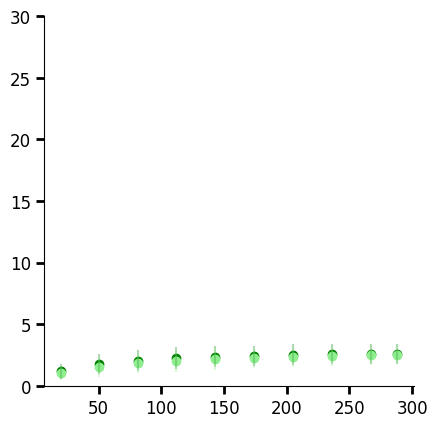

In [36]:
plt.scatter(sizes, evs_sampling_m["magneto"], color="green")
plt.errorbar(sizes, evs_sampling_m["magneto"], yerr=evs_sampling_mad["magneto"], color="green", alpha=0.3, linestyle="None")
plt.scatter(sizes, evs_sampling_m["nano"], color="lightgreen")
plt.errorbar(sizes, evs_sampling_m["nano"], yerr=evs_sampling_mad["nano"], color="lightgreen", alpha=0.3, linestyle="None")
plt.ylim(0,30)
journal_figure()
plt.savefig("./figures_sampling/monkeys_predictions.eps")

In [9]:
from scipy.optimize import curve_fit

# Example: hyperbolic saturation
def hyperbolic(x, a, b):
    return (a * x) / (b + x)

In [10]:
x = np.array(sizes)
y_m = np.array(evs_sampling_m["magneto"])
y_n = np.array(evs_sampling_m["nano"])

# Initial guess: a = max(y), b = median(x)
popt_m, pcov_m = curve_fit(hyperbolic, x, y_m, p0=[np.max(y_m), np.median(x)])
a_fit_m, b_fit_m = popt_m
print(f"Asymptote (a) = {a_fit_m:.2f}")

popt_n, pcov_n = curve_fit(hyperbolic, x, y_n, p0=[np.max(y_n), np.median(x)])
a_fit_n, b_fit_n = popt_n
print(f"Asymptote (a) = {a_fit_n:.2f}")


Asymptote (a) = 2.87
Asymptote (a) = 2.85


In [11]:
sizes_2 = np.linspace(20, 99850, 20).astype(int)

In [12]:
out_dir = f'./results_predictions/within_model_v4/{model}/'
evs_sampling_self_m = []
evs_sampling_self_mad = []
for s in sizes_2:
    ev_path = os.path.join(out_dir, f'ev_{model}_{s}.npy')
    ev = np.load(ev_path)
    evs_sampling_self_m.append(np.nanmean(ev))
    evs_sampling_self_mad.append(nanmad(ev.reshape(-1)))

In [17]:
out_dir_m = f'./results_predictions/monkey2model/magneto/v4_sampling/'
sizes=[20, 50, 81, 112, 143, 174, 205, 236, 267, 288]

evs_sampling_m1 = []
evs_sampling_m2 = []
for s in sizes:
    ev_path_m = os.path.join(f'./results_predictions/monkey2model/magneto/v4_sampling/', f'ev_resnet_{s}.npy')
    ev_path_n = os.path.join(f'./results_predictions/monkey2model/nano/v4_sampling/', f'ev_resnet_{s}.npy')
    ev_m = np.load(ev_path_m)
    ev_n = np.load(ev_path_n)
    evs_sampling_m1.append(ev_m)
    evs_sampling_m2.append(ev_n)

In [18]:
out_dir = f'./results_predictions/within_model_v4/{model}/'
evs_sampling_self = []
for s in sizes_2:
    ev_path = os.path.join(out_dir, f'ev_{model}_{s}.npy')
    ev = np.load(ev_path)
    evs_sampling_self.append(ev)

In [19]:
np.array(evs_sampling_self).shape, np.array(evs_sampling_m1).shape 

((20, 10, 500), (10, 10, 500))

In [20]:
from scipy.stats import wilcoxon

# Assuming you have arrays of reverse %EV values
stat, p = wilcoxon(np.array(evs_sampling_m1).mean(axis=(0,1)), np.array(evs_sampling_self).mean(axis=(0,1)), alternative='less')  # brain < model
print(f"Wilcoxon: W = {stat}, p = {p:.3f}")
stat, p = wilcoxon(np.array(evs_sampling_m2).mean(axis=(0,1)), np.array(evs_sampling_self).mean(axis=(0,1)), alternative='less')  # brain < model
print(f"Wilcoxon: W = {stat}, p = {p:.3f}")

Wilcoxon: W = 0.0, p = 0.000
Wilcoxon: W = 2.0, p = 0.000


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

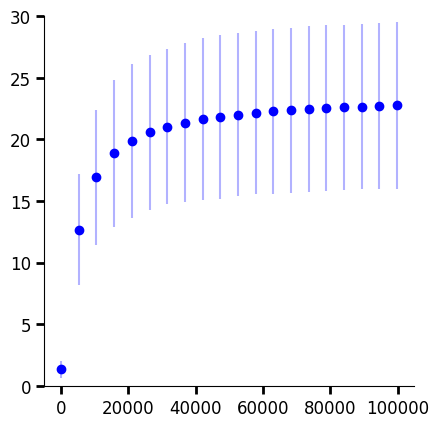

In [35]:
plt.scatter(sizes_2, evs_sampling_self_m, color="blue")
plt.errorbar(sizes_2, evs_sampling_self_m, yerr=evs_sampling_self_mad, color="blue", alpha=0.3, linestyle="None")
plt.ylim(0,30)
journal_figure()
plt.savefig("./figures_sampling/self_predictions.eps")

In [21]:
sizes_3 = np.linspace(20, 100352, 20).astype(int)

In [22]:
evs_sampling_instances_m = {}
evs_sampling_instances_mad = {}
for instance in ["resnet_0", "resnet_3", "resnet_4", "resnet_5", "resnet_6"]:
    out_dir = f'./results_predictions/within_model_v4/{model}/'
    evs_sampling_instances_m[instance] = []
    evs_sampling_instances_mad[instance] = []
    for s in sizes_3:
        ev_path = os.path.join(out_dir, f'ev_{instance}_{s}.npy')
        ev = np.load(ev_path)
        evs_sampling_instances_m[instance].append(np.nanmean(ev))
        evs_sampling_instances_mad[instance].append(nanmad(ev.reshape(-1)))

In [26]:
out_dir = f'./results_predictions/within_model_v4/{model}/'
evs_sampling_instances = []
for instance in ["resnet_0", "resnet_3", "resnet_4", "resnet_5", "resnet_6"]:
    out_dir = f'./results_predictions/within_model_v4/{model}/'
    for s in sizes_3:
        ev_path = os.path.join(out_dir, f'ev_{instance}_{s}.npy')
        ev = np.load(ev_path)
        evs_sampling_instances.append(ev)

In [24]:
np.array(evs_sampling_instances).shape

(100, 10, 500)

In [27]:
stat, p = wilcoxon(np.array(evs_sampling_instances).mean(axis=(0,1)), np.array(evs_sampling_self).mean(axis=(0,1)), alternative='less')  # brain < model
print(f"Wilcoxon: W = {stat}, p = {p:.3f}")

Wilcoxon: W = 36.0, p = 0.000


In [33]:
stat, p = wilcoxon(np.array(evs_sampling_m1).mean(axis=(0,1)), np.array(evs_sampling_instances).mean(axis=(0,1)), alternative='less')  # brain < model
print(f"Wilcoxon: W = {stat}, p = {p:.3f}") #Wilcoxon: W = 125204.0, p = 1.000
stat, p = wilcoxon(np.array(evs_sampling_m2).mean(axis=(0,1)), np.array(evs_sampling_instances).mean(axis=(0,1)), alternative='less')  # brain < model
print(f"Wilcoxon: W = {stat}, p = {p:.3f}") #Wilcoxon: W = 125198.0, p = 1.000

Wilcoxon: W = 46.0, p = 0.000
Wilcoxon: W = 52.0, p = 0.000


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

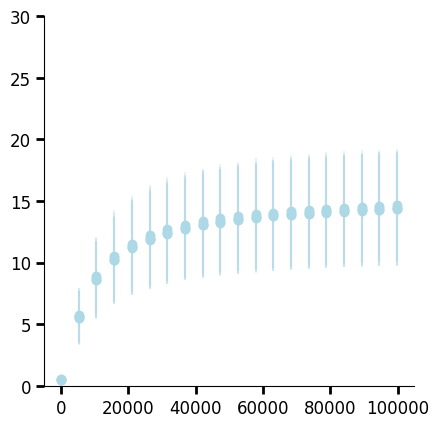

In [32]:
for instance in ["resnet_0", "resnet_3", "resnet_4", "resnet_5", "resnet_6"]:
    plt.scatter(sizes_2, evs_sampling_instances_m[instance], color="lightblue")
    plt.errorbar(sizes_2, evs_sampling_instances_m[instance], yerr=evs_sampling_instances_mad[instance], color="lightblue", alpha=0.3, linestyle="None")

plt.ylim(0,30)
journal_figure()
plt.savefig("./figures_sampling/instance_predictions.eps")

In [6]:
full_model_list = ["alexnet_relu", "resnet18", "resnet18_robust", "resnet18_ssl", "resnet", "resnet_ssl", "resnet_swsl", "resnetSIN", "resnet152_2", "resnet101", "resnet101_ssl", "resnet_robust_eps1", "resnet_robust_eps3", "inception", "inceptionv1", "vit", "vit_ssl", "vgg16", "vgg16_robust", "densenet", "densenet169", "densenet161", "densenet161_robust", "densenet121", "convnext", "convnext_ssl", "mobilenet", "mobilenet_v2", "mobilenet_robust", "squeezenet", "cornetS_t0", "cornetS_reg", "cornetS_reg2", "cornetRT_t4", "nasnet", "pnasnet", "swin", "swin_ssl", "shufflenet", "shufflenet_robust"] #, "cornetS_reg"


In [7]:
all_evs_monkeys_m = []
all_evs_monkeys_mad = []
all_evs_models_m = []
all_evs_models_mad = []
for model in full_model_list:
    out_dir = f'./results_predictions/monkey2model/magneto/v4_sampling/'
    ev_path = os.path.join(out_dir, f'ev_{model}_288.npy')
    ev = np.load(ev_path)
    all_evs_monkeys_m.append(np.nanmean(ev))
    all_evs_monkeys_mad.append(nanmad(ev.reshape(-1)))
    
    out_dir = f'./results_predictions/within_model_v4/{model}/'
    ev_path = os.path.join(out_dir, f'ev_{model}.npy')
    ev = np.load(ev_path)
    all_evs_models_m.append(np.nanmean(ev))
    all_evs_models_mad.append(nanmad(ev.reshape(-1)))

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

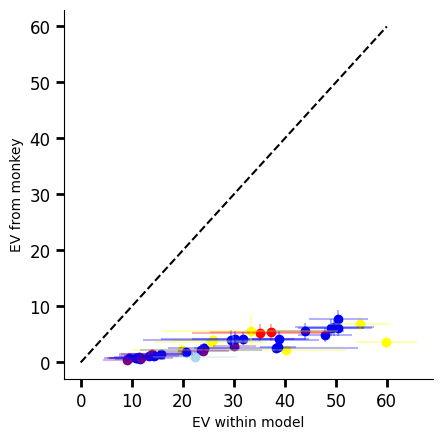

In [9]:
for i, model in enumerate(full_model_list):
    if "robust" in model:
        color="yellow"
    elif "ssl" in model:
        color="purple"
    elif model == "vit" or model=="swin":
        color="lightblue"
    elif "reg" in model:
        color="red"
    else:
        color="blue"
    plt.scatter(all_evs_models_m[i], all_evs_monkeys_m[i], color=color)
    plt.errorbar(all_evs_models_m[i], all_evs_monkeys_m[i], xerr=all_evs_models_mad[i], yerr=all_evs_monkeys_mad[i], linestyle="None", alpha=0.3, color=color)
plt.plot([0,60], [0,60], linestyle="--", color="black")
plt.xlabel("EV within model")
plt.ylabel("EV from monkey")
journal_figure()
plt.savefig("./figures_sampling/ev_models_vs_monkeys.eps")

In [11]:
from scipy.stats import pearsonr
pearsonr(all_evs_models_m, all_evs_monkeys_m)

PearsonRResult(statistic=0.8597696606745948, pvalue=1.2044177074279629e-12)